# Ensemble Learning
You should build an end-to-end machine learning pipeline using an ensemble learning model. In particular, you should do the following:
- Load the `mnist` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Build an end-to-end machine learning pipeline, including an ensemble model, such as [random forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) or [gradient boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html).
- Optimize your pipeline by cross-validating your design decisions. 
- Test the best pipeline on the test set and report various [evaluation metrics](https://scikit-learn.org/0.15/modules/model_evaluation.html).  
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

### Load libraries

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

### Load dataset

In [66]:
mnist_db = pd.read_csv('/Users/adolfomytr/Documents/Alemania/Master/GISMA/Materias/teaching-main/datasets/mnist.csv')
mnist_db = mnist_db.set_index('id')
mnist_db.head()

,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
id,,,,,,,,,,,,,,,,,,,,,
31953,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34452,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60897,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36953,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1981,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Split into training and testing set

In [67]:
mnist_train, mnist_test = train_test_split(mnist_db)

x_train = mnist_train.drop(['class'], axis=1)
y_train = mnist_train['class']
x_test = mnist_test.drop(['class'], axis=1)
y_test = mnist_test['class']

print('x_train', x_train.shape)
print('x_test', x_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

x_train (3000, 784)
x_test (1000, 784)
y_train (3000,)
y_test (1000,)


### Train Random Forest Classifier

In [68]:
rf_grid = {'n_estimators':[80, 100, 120, 140], 'criterion':['entropy'], 'max_depth':[7, 8, 9, 10]}
grid_search_rf = GridSearchCV(RandomForestClassifier(), rf_grid, cv=5, error_score='raise')
grid_search_rf.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [7, 8, 9, 10],
                         'n_estimators': [80, 100, 120, 140]})

In [69]:
print('best_score RF', grid_search_rf.best_score_)
print('best_params RF', grid_search_rf.best_params_)
print('best_estimator RF', grid_search_rf.best_estimator_)

best_score RF 0.9276666666666668
best_params RF {'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 120}
best_estimator RF RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=120)


### Train Gradient Booster

In [70]:
gb_grid = {'loss':['log_loss'], 'learning_rate':[0.01, 0.2], 'n_estimators':[100, 120]}
grid_search_gb = GridSearchCV(GradientBoostingClassifier(), gb_grid, cv=5, error_score='raise')
grid_search_gb.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.2], 'loss': ['log_loss'],
                         'n_estimators': [100, 120]})

In [71]:
print('best_score GB', grid_search_gb.best_score_)
print('best_params GB', grid_search_gb.best_params_)
print('best_estimator GB', grid_search_gb.best_estimator_)

best_score GB 0.9063333333333332
best_params GB {'learning_rate': 0.2, 'loss': 'log_loss', 'n_estimators': 120}
best_estimator GB GradientBoostingClassifier(learning_rate=0.2, n_estimators=120)


### Test the model

In [72]:
y_predicted_rf = grid_search_rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_predicted_rf)
print('Accuracy RF:', accuracy_rf)

Accuracy RF: 0.924


In [73]:
y_predicted_gb = grid_search_gb.predict(x_test)
accuracy_gb = accuracy_score(y_test, y_predicted_gb)
print('Accuracy GB:', accuracy_gb)

Accuracy GB: 0.914


### Confusion Matrix RF

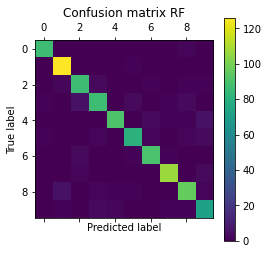

,0,1,2,3,4,5,6,7,8,9
0,87,0,0,0,0,0,0,0,2,0
1,0,126,0,0,0,1,0,0,0,0
2,0,2,87,3,0,0,1,0,1,1
3,1,0,6,87,0,3,0,1,3,0
4,0,0,0,0,91,0,3,1,1,6
5,1,0,0,2,0,81,2,0,2,3
6,0,0,3,0,0,1,90,1,0,0
7,0,0,2,0,0,0,0,107,0,3
8,0,6,0,2,1,1,0,0,96,2
9,0,1,0,3,2,0,0,1,1,72


In [74]:
cm_rf = confusion_matrix(y_test, y_predicted_rf)
plt.matshow(cm_rf)
plt.title('Confusion matrix RF')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

pd.DataFrame(confusion_matrix(y_test, y_predicted_rf))

### Confusion Matrix GB

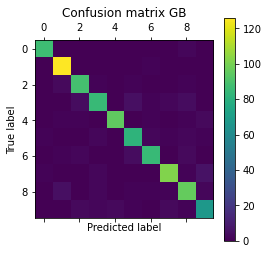

,0,1,2,3,4,5,6,7,8,9
0,87,0,0,0,0,0,0,0,2,0
1,0,126,0,0,0,0,1,0,0,0
2,0,3,89,1,0,1,0,0,1,0
3,0,0,4,85,0,5,1,2,4,0
4,0,1,1,0,95,0,1,0,1,3
5,1,0,0,2,0,82,2,1,2,1
6,0,1,2,0,0,4,85,0,3,0
7,1,0,0,2,0,0,0,102,1,6
8,0,5,0,2,0,1,1,1,96,2
9,0,0,3,2,3,1,0,3,1,67


In [75]:
cm_gb = confusion_matrix(y_test, y_predicted_gb)
plt.matshow(cm_gb)
plt.title('Confusion matrix GB')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

pd.DataFrame(confusion_matrix(y_test, y_predicted_gb))